#**TALLER 4**

### El jefe de personal de una agencia gubernamental administró cuatro pruebas de aptitud a cada uno de los 25 aspirantes a cargos administrativos en la agencia. Para el propósito del estudio, se aceptaron a todos los aspirantes para 25 posiciones independiente de sus puntajes en las pruebas. Después de un periodo de prueba, cada aspirante fue evaluado en su habilidad de trabajo. El puntaje obtenido relativo a la habilidad laboral (Y ) y los puntajes en las cuatro pruebas (X1, X2, X3, X4) están consignados en el archivo adjunto.

### Emplee el análisis de regresión lineal múltiple para obtener una ecuación de regresión estimada que sirva para pronosticar la habilidad laboral, dadas las demás variables (Xi).

### **Punto 1**

### Identifique observaciones que puedan considerarse problemáticas (datos atípicos, puntos de balanceo e influyentes) y analice si debe eliminarlas de su conjunto de datos o no, justifique. Repita la construcción del modelo de regresión si eliminó observaciones.

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# AJUSTE DEL MODELO DE REGRESION LINEAL MULTIPLE
data = pd.read_csv("base_trabajo4_raw.csv", sep=";", header=0)

# Mostramos las primeras filas para verificar la carga
print("Primeras filas del dataset de infecciones hospitalarias:")
print(data.head())

X = data[["X1", "X2", "X3", "X4"]]
Y = data["Y"]

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

Primeras filas del dataset de infecciones hospitalarias:
    Y   X1   X2   X3   X4
0  88   86  110  100   87
1  80   62   97   99  100
2  96  110  107  103  103
3  76  101  117   93   95
4  80  100  101   95   88
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              387.0
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                    2.43e-19
Time:                        23:15:41   Log-Likelihood:                         -95.174
No. Observations:                  25   AIC:                                      198.3
Df Residuals:                      21   BIC:                                      203.2
Df Model:                           4                                              

### **Cálculo de la tabla anova para el modelo de regresion lineal multiple**

In [ ]:
n = len(Y)
#X = X[["X1", "X3", "X5"]]
k = X.shape[1]  # Número de predictores (sin contar la constante
gl_regresion = k
gl_residual = n - k
gl_total = n - 1

sc_total = np.sum((Y - np.mean(Y))**2) # SST
sc_residual = np.sum(modelo.resid**2) # SSE
sc_regresion = sc_total - sc_residual # SSR
mc_regresion = sc_regresion / gl_regresion # MSR
mc_residual = sc_residual / gl_residual # MSE
f_statistic = mc_regresion / mc_residual # F
p_value = 1 - stats.f.cdf(f_statistic, gl_regresion, gl_residual)

anova_table = pd.DataFrame({
    'Fuente de variación': ['Regresión', 'Residual', 'Total'],
    'Suma de cuadrados': [sc_regresion, sc_residual, sc_total],
    'Grados de libertad': [gl_regresion, gl_residual, gl_total],
    'Media cuadrática': [mc_regresion, mc_residual, ''],
    'F': [f_statistic, '', ''],
    'Valor p': [p_value, '', '']
})

anova_table['Suma de cuadrados'] = anova_table['Suma de cuadrados'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
anova_table['Media cuadrática'] = anova_table['Media cuadrática'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
anova_table['F'] = anova_table['F'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
anova_table['Valor p'] = anova_table['Valor p'].apply(lambda x: f"{x:.6f}" if isinstance(x, (int, float)) else x)
print(anova_table.to_string(index=False))

Fuente de variación Suma de cuadrados  Grados de libertad Media cuadrática       F  Valor p
          Regresión         6088.1882                   4        1522.0471 10.7771 0.000066
           Residual         2965.8118                  21         141.2291                 
              Total         9054.0000                  24                                  


### El modelo de regresión lineal es altamente significativo.

### **Análisis de atípicos (Residuales estandarizados)**

[ 0.21467355 -0.84413954 -0.31895094 -1.37550002 -0.61133067 -0.66376947
 -1.71233966  1.3116514   0.1553975   0.17639974 -1.69403945  1.51118288
 -0.04353366 -0.67817204  0.61261811  0.45685486  0.24300965  1.34036326
  0.42720896 -0.77957636 -1.23657045  0.81876093 -0.28475578  1.26301943
 -0.06759896]
Observaciones con residuos estandarizados mayores a 3 en valor absoluto:
Empty DataFrame
Columns: [X1, X2, X3, X4]
Index: []


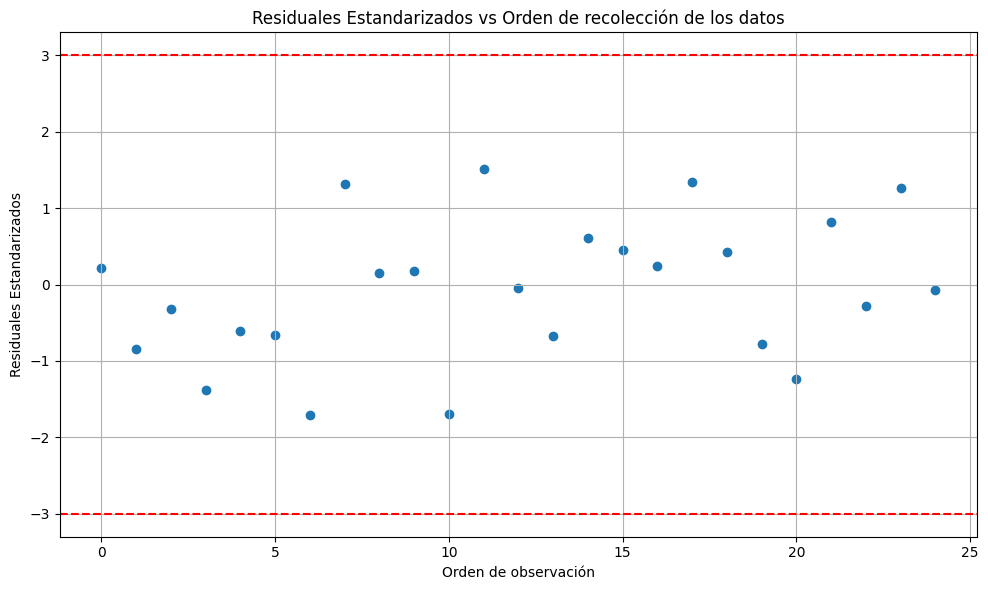

In [ ]:
res = modelo.resid_pearson
print(res)

# aplicar mask > 3
mask = np.abs(res) > 3
print("Observaciones con residuos estandarizados mayores a 3 en valor absoluto:")
print(X[mask])

# grafica atipicos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(res)), res)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title('Residuales Estandarizados vs Orden de recolección de los datos')
plt.xlabel('Orden de observación')
plt.ylabel('Residuales Estandarizados')
plt.grid(True)
plt.tight_layout()
plt.show()

### Todavía no se demuestra que hayan valores atípicos en el dataset.

### **Análisis de atípicos (Residuales studentizados)**

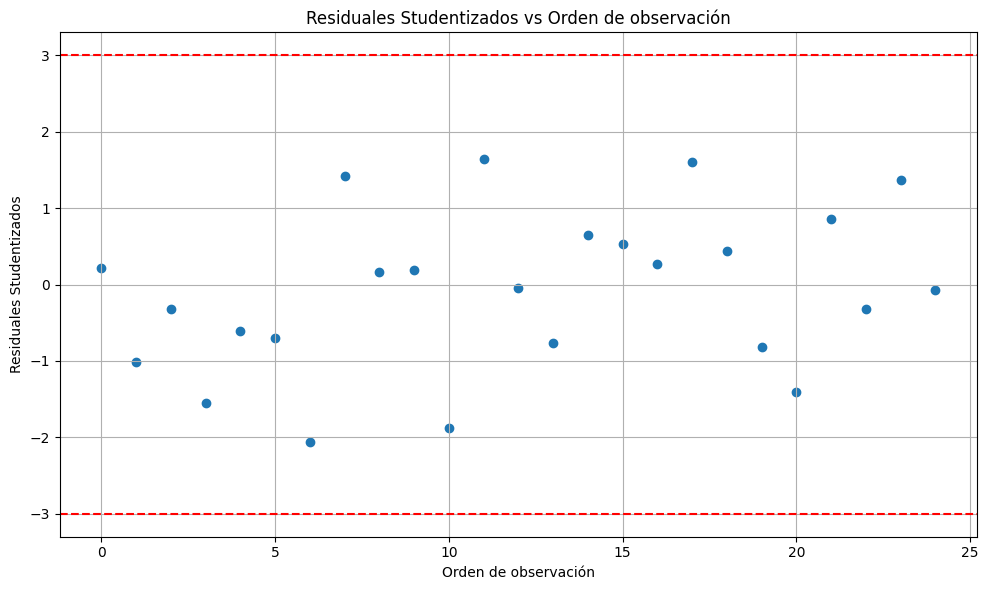

In [ ]:
# Residuales studentizados externamente (más robustos para detectar outliers)
influence = modelo.get_influence()
res_studentized = influence.resid_studentized_external

# Usar estos para detectar outliers
mask = np.abs(res_studentized) > 3

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(range(len(res_studentized)), res_studentized)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title('Residuales Studentizados vs Orden de observación')
plt.xlabel('Orden de observación')
plt.ylabel('Residuales Studentizados')
plt.grid(True)
plt.tight_layout()
plt.show()

### Se demuestra que el modelo no está sineod afectado por puntos extraños en el dataset.

### **Matriz Hat (Leverage)**

In [ ]:
# matriz hat
influence = modelo.get_influence()
hat_matrix = influence.hat_matrix_diag
print("Valores de la matriz hat (leverage):")
print(hat_matrix)

# identificar valores atipicos en la matriz hat
threshold = 2 * (k + 1) / n
print(f"Umbral para identificar valores atípicos en la matriz hat: {threshold:.4f}")
outliers_hat = np.where(hat_matrix > threshold)[0]
print("Índices de observaciones con valores atípicos en la matriz hat:")
print(outliers_hat)
print("Observaciones con valores atípicos en la matriz hat:")
print(data.iloc[outliers_hat])

Valores de la matriz hat (leverage):
[0.09772096 0.31255255 0.07889123 0.15684697 0.03853867 0.12856349
 0.20455852 0.10376308 0.08127258 0.16328793 0.08706631 0.08026619
 0.30070059 0.23932518 0.13292007 0.27367427 0.19944466 0.24383272
 0.11033349 0.09793166 0.18791659 0.10427239 0.23971819 0.10856132
 0.22804035]
Umbral para identificar valores atípicos en la matriz hat: 0.4000
Índices de observaciones con valores atípicos en la matriz hat:
[]
Observaciones con valores atípicos en la matriz hat:
Empty DataFrame
Columns: [Y, X1, X2, X3, X4]
Index: []


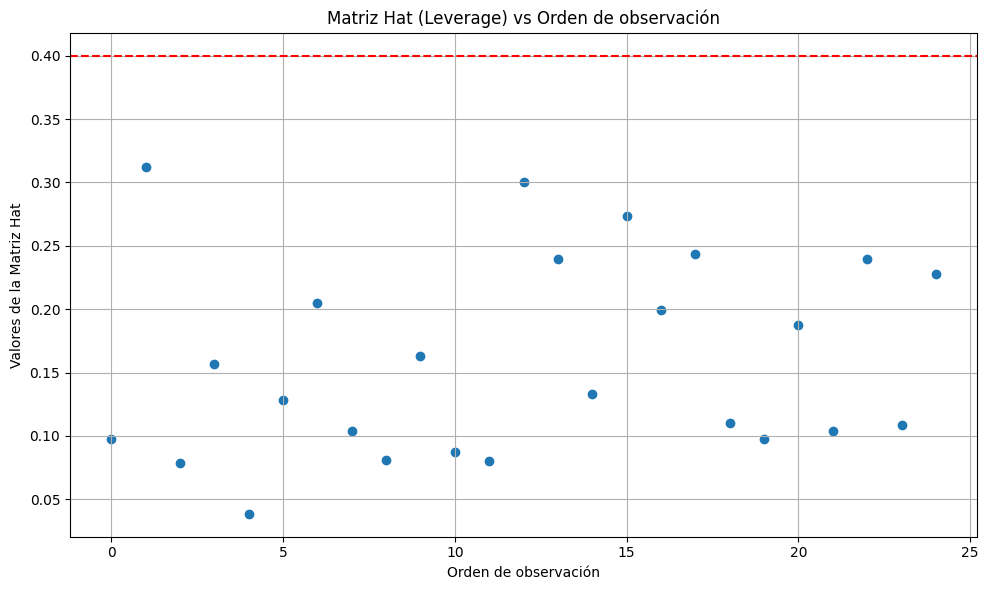

In [ ]:
# grafica outliers en la matriz hat
plt.figure(figsize=(10, 6))
plt.scatter(range(len(hat_matrix)), hat_matrix)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title('Matriz Hat (Leverage) vs Orden de observación')
plt.xlabel('Orden de observación')
plt.ylabel('Valores de la Matriz Hat')
plt.grid(True)
plt.tight_layout()
plt.show()

### No existen observaciones problemáticas. Nningún dato individual está ejerciendo una influencia desproporcionada sobre el modelo.

### **Distancia de Cooks**

Distancia de Cook para cada observación:
[0.00138294 0.11781824 0.0023648  0.10435771 0.00389516 0.0186475
 0.23698505 0.05556152 0.0005813  0.00181442 0.07494777 0.05417294
 0.00029134 0.04755652 0.01658792 0.02706871 0.00459438 0.19153197
 0.00636024 0.01828528 0.10892852 0.02178069 0.00840692 0.0544819
 0.00043716]
Umbral para identificar valores atípicos en la distancia de Cook: 0.1600
Índices de observaciones con valores atípicos en la distancia de Cook:
[ 6 17]
Observaciones con valores atípicos en la distancia de Cook:
      Y   X1   X2   X3   X4
6    58  120   77   80   74
17  127  150  118  107  110


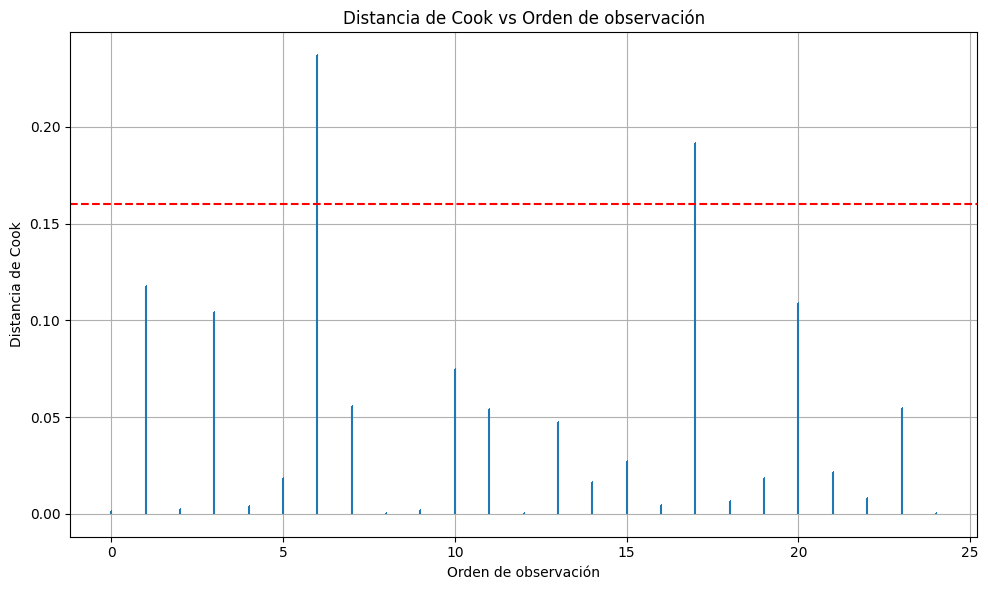

In [ ]:
# distancia de cooks
cooks_d = influence.cooks_distance[0]
print("Distancia de Cook para cada observación:")
print(cooks_d)

# identificar valores atipicos en la distancia de cooks
cooks_threshold = 4 / n # revisar > a 1
print(f"Umbral para identificar valores atípicos en la distancia de Cook: {cooks_threshold:.4f}")
outliers_cooks = np.where(cooks_d > cooks_threshold)[0]
print("Índices de observaciones con valores atípicos en la distancia de Cook:")
print(outliers_cooks)
print("Observaciones con valores atípicos en la distancia de Cook:")
print(data.iloc[outliers_cooks])

# grafica outliers en la distancia de cooks
plt.figure(figsize=(10, 6))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(y=cooks_threshold, color='r', linestyle='--')
plt.title('Distancia de Cook vs Orden de observación')
plt.xlabel('Orden de observación')
plt.ylabel('Distancia de Cook')
plt.grid(True)
plt.tight_layout()
plt.show()

### Las observaciones 6 y 17 ejercen una influencia notable

DFFITS para cada observación:
[ 0.07267176 -0.68712132 -0.0951651  -0.66717025 -0.12295753 -0.26979733
 -1.04642593  0.48265684  0.04708762  0.08321262 -0.57946298  0.48378294
 -0.03331675 -0.4319009   0.25401172  0.32334122  0.13252958  0.90704308
  0.15642415 -0.26826672 -0.67515776  0.29332644 -0.17941528  0.4763231
 -0.04081482]
Umbral para identificar valores atípicos en DFFITS: 0.8944
Índices de observaciones con valores atípicos en DFFITS:
[ 6 17]
Observaciones con valores atípicos en DFFITS:
      Y   X1   X2   X3   X4
6    58  120   77   80   74
17  127  150  118  107  110


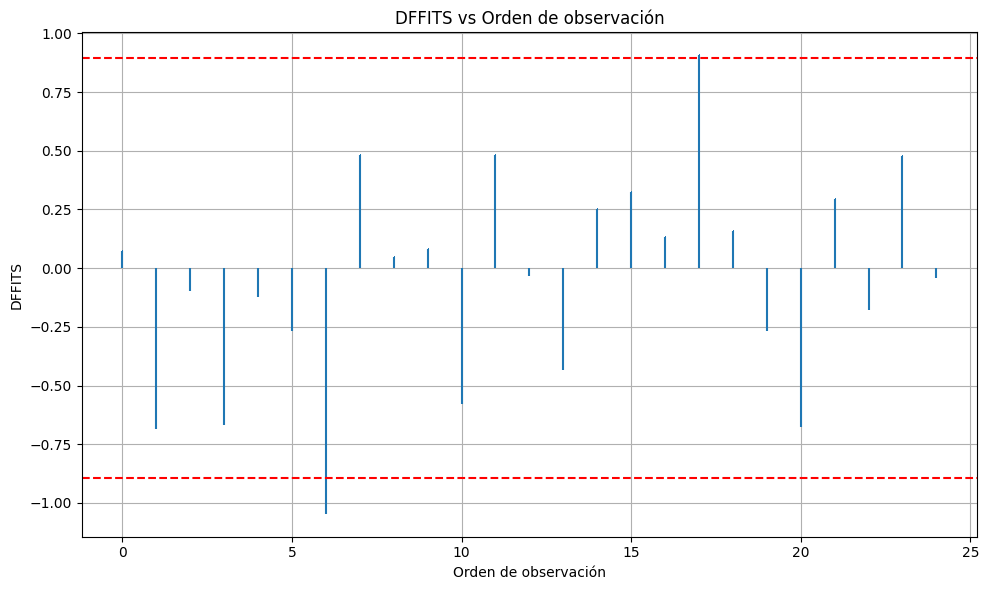

In [ ]:
dffits = influence.dffits[0]
print("DFFITS para cada observación:")
print(dffits)

# identificar valores atipicos en dffits
dffits_threshold = 2 * np.sqrt((k + 1) / n)
print(f"Umbral para identificar valores atípicos en DFFITS: {dffits_threshold:.4f}")
outliers_dffits = np.where(np.abs(dffits) > dffits_threshold)[0]
print("Índices de observaciones con valores atípicos en DFFITS:")
print(outliers_dffits)
print("Observaciones con valores atípicos en DFFITS:")
print(data.iloc[outliers_dffits])

# grafica outliers en dffits
plt.figure(figsize=(10, 6))
plt.stem(range(len(dffits)), dffits, markerfmt=",", basefmt=" ")
plt.axhline(y=dffits_threshold, color='r', linestyle='--')
plt.axhline(y=-dffits_threshold, color='r', linestyle='--')
plt.title('DFFITS vs Orden de observación')
plt.xlabel('Orden de observación')
plt.ylabel('DFFITS')
plt.grid(True)
plt.tight_layout()
plt.show()

### De nuevo las observaciones 6 y 17 influyen notablemente

### Se borrarán estas observaciones con el fin de limpiar el conjunto de datos, y se hará de nuevo la construcción del modelo

### **Construcción del modelo después de la limpieza del conjunto de datos**

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# AJUSTE DEL MODELO DE REGRESION LINEAL MULTIPLE
data = pd.read_csv("base_trabajo4_limpio.csv", sep=";", header=0)

# Mostramos las primeras filas para verificar la carga
print("Primeras filas del dataset de infecciones hospitalarias:")
print(data.head())

X = data[["X1", "X2", "X3", "X4"]]
Y = data["Y"]

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

Primeras filas del dataset de infecciones hospitalarias:
    Y   X1   X2   X3   X4
0  88   86  110  100   87
1  80   62   97   99  100
2  96  110  107  103  103
3  76  101  117   93   95
4  80  100  101   95   88
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              422.8
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                    2.82e-18
Time:                        23:22:36   Log-Likelihood:                         -85.316
No. Observations:                  23   AIC:                                      178.6
Df Residuals:                      19   BIC:                                      183.2
Df Model:                           4                                              

In [ ]:
# calculo de la tabla anova para el modelo de regresion lineal multiple
n = len(Y)
#X = X[["X1", "X3", "X5"]]
k = X.shape[1]  # Número de predictores (sin contar la constante
gl_regresion = k
gl_residual = n - k
gl_total = n - 1

sc_total = np.sum((Y - np.mean(Y))**2) # SST
sc_residual = np.sum(modelo.resid**2) # SSE
sc_regresion = sc_total - sc_residual # SSR
mc_regresion = sc_regresion / gl_regresion # MSR
mc_residual = sc_residual / gl_residual # MSE
f_statistic = mc_regresion / mc_residual # F
p_value = 1 - stats.f.cdf(f_statistic, gl_regresion, gl_residual)

anova_table = pd.DataFrame({
    'Fuente de variación': ['Regresión', 'Residual', 'Total'],
    'Suma de cuadrados': [sc_regresion, sc_residual, sc_total],
    'Grados de libertad': [gl_regresion, gl_residual, gl_total],
    'Media cuadrática': [mc_regresion, mc_residual, ''],
    'F': [f_statistic, '', ''],
    'Valor p': [p_value, '', '']
})

anova_table['Suma de cuadrados'] = anova_table['Suma de cuadrados'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
anova_table['Media cuadrática'] = anova_table['Media cuadrática'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
anova_table['F'] = anova_table['F'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
anova_table['Valor p'] = anova_table['Valor p'].apply(lambda x: f"{x:.6f}" if isinstance(x, (int, float)) else x)
print(anova_table.to_string(index=False))

Fuente de variación Suma de cuadrados  Grados de libertad Media cuadrática      F  Valor p
          Regresión         4428.3755                   4        1107.0939 9.3699 0.000234
           Residual         2244.9289                  19         118.1542                
              Total         6673.3043                  22                                 


### **Punto 2**

### Realice la prueba de significancia del modelo, interprete

In [ ]:
alpha = 0.05

# Interpretación
print("\n=== PRUEBA DE SIGNIFICANCIA DEL MODELO ===")
print(f"Estadístico F: {f_statistic:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Nivel de significancia (α): {alpha}")

if p_value < alpha:
    print(f"\nConclusión: Como p-value ({p_value:.6f}) < α ({alpha})")
    print("Se RECHAZA H₀: El modelo de regresión ES significativo")
    print("Al menos una variable predictora tiene efecto significativo sobre Y")
else:
    print(f"\nConclusión: Como p-value ({p_value:.6f}) >= α ({alpha})")
    print("NO se rechaza H₀: El modelo de regresión NO es significativo")
    print("Las variables predictoras no explican significativamente a Y")


=== PRUEBA DE SIGNIFICANCIA DEL MODELO ===
Estadístico F: 9.3699
Valor p: 0.000234
Nivel de significancia (α): 0.05

Conclusión: Como p-value (0.000234) < α (0.05)
Se RECHAZA H₀: El modelo de regresión ES significativo
Al menos una variable predictora tiene efecto significativo sobre Y


### Tras la depuración de los casos influyentes, el modelo gana en estabilidad y robustez. El resultado sugiere que la combinación de predictores contribuye de forma conjunta a explicar la variabilidad de las infecciones hospitalarias.

### **Punto 3**

### Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete

In [ ]:
# Extraer los coeficientes del modelo
r2 = modelo.rsquared
r2_ajustado = modelo.rsquared_adj
n = len(Y)
k = X.shape[1]

print("\n" + "="*70)
print("INTERPRETACIÓN DE LOS COEFICIENTES DE DETERMINACIÓN")
print("="*70)

print(f"\n📊 R² (Coeficiente de Determinación): {r2:.4f}")
print(f"   → Interpretación: El {r2*100:.2f}% de la variabilidad total de Y")
print(f"     (infecciones hospitalarias) es explicada por las variables")
print(f"     predictoras X1, X2, X3 y X4 en el modelo.")
print(f"   → El {(1-r2)*100:.2f}% restante se debe a factores no incluidos")
print(f"     en el modelo o al error aleatorio.")

print(f"\n📊 R² Ajustado: {r2_ajustado:.4f}")
print(f"   → Interpretación: Ajusta el R² penalizando por el número de")
print(f"     predictores ({k} variables) en relación al tamaño de muestra (n={n}).")
print(f"   → Es una medida más conservadora y apropiada para comparar")
print(f"     modelos con diferente número de variables.")

# Comparación
diferencia = r2 - r2_ajustado
print(f"\n📉 Diferencia R² - R² ajustado: {diferencia:.4f}")
if diferencia < 0.05:
    print(f"   → La diferencia es pequeña, lo que sugiere que el número")
    print(f"     de variables es apropiado para el tamaño de muestra.")
else:
    print(f"   → La diferencia es considerable, podría indicar que el modelo")
    print(f"     tiene demasiadas variables para el tamaño de muestra.")

# Evaluación de la calidad del ajuste
print(f"\n🎯 Evaluación de la calidad del ajuste:")
if r2_ajustado >= 0.70:
    print(f"   EXCELENTE: El modelo explica muy bien la variabilidad de Y")
elif r2_ajustado >= 0.50:
    print(f"   BUENO: El modelo tiene un ajuste aceptable")
elif r2_ajustado >= 0.30:
    print(f"   MODERADO: El modelo tiene un ajuste modesto")
else:
    print(f"   BAJO: El modelo explica poco de la variabilidad de Y")

print("="*70)


INTERPRETACIÓN DE LOS COEFICIENTES DE DETERMINACIÓN

📊 R² (Coeficiente de Determinación): 0.9889
   → Interpretación: El 98.89% de la variabilidad total de Y
     (infecciones hospitalarias) es explicada por las variables
     predictoras X1, X2, X3 y X4 en el modelo.
   → El 1.11% restante se debe a factores no incluidos
     en el modelo o al error aleatorio.

📊 R² Ajustado: 0.9866
   → Interpretación: Ajusta el R² penalizando por el número de
     predictores (4 variables) en relación al tamaño de muestra (n=23).
   → Es una medida más conservadora y apropiada para comparar
     modelos con diferente número de variables.

📉 Diferencia R² - R² ajustado: 0.0023
   → La diferencia es pequeña, lo que sugiere que el número
     de variables es apropiado para el tamaño de muestra.

🎯 Evaluación de la calidad del ajuste:
   EXCELENTE: El modelo explica muy bien la variabilidad de Y


### El fenómeno está altamente determinado por los factores incluidos en el modelo, dejando poco margen a variabilidad no explicada. La mayor parte de las infecciones hospitalarias puede atribuirse a los factores recogidos en las variables independientes, lo cual respalda su relevancia práctica

### **Punto 4**

### Analice si hay problemas de multicolinealidad

### **Matriz de correlación entre las variables**

In [ ]:
correlacion = X.corr()
print("Matriz de correlación entre las variables:")
print(correlacion)

Matriz de correlación entre las variables:
          X1        X2        X3        X4
X1  1.000000  0.131769  0.274868  0.346304
X2  0.131769  1.000000  0.411310  0.270596
X3  0.274868  0.411310  1.000000  0.731098
X4  0.346304  0.270596  0.731098  1.000000


### **Gráfico de dispersión entre las variables**

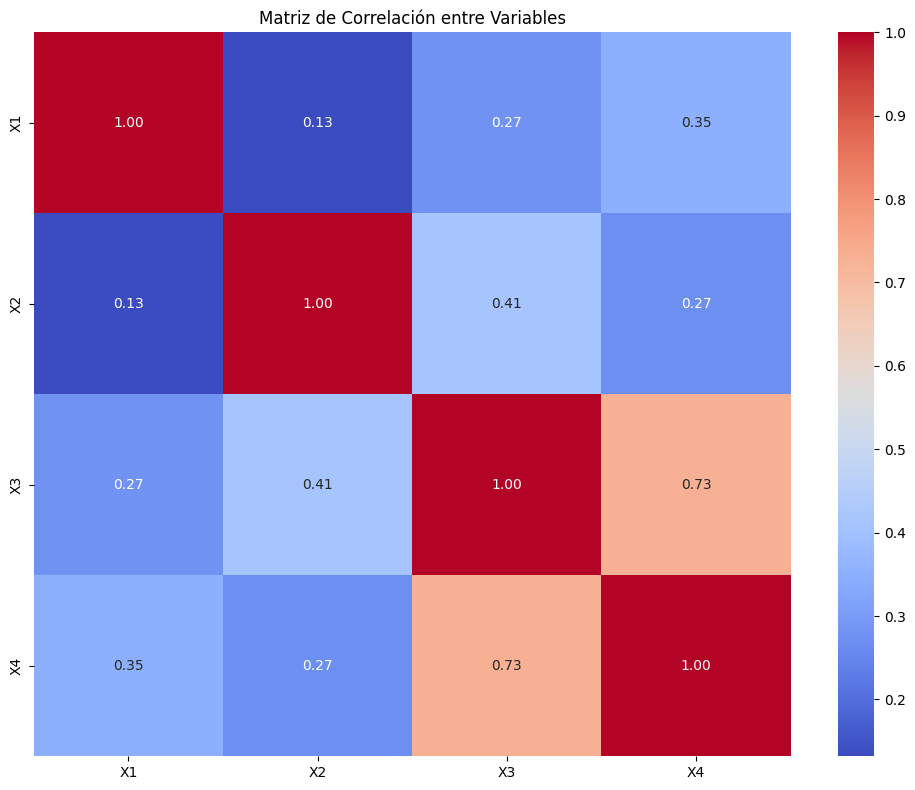

In [ ]:
# grafico de dispersión entre las variables heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables")
plt.tight_layout()
plt.show()

### Las correlaciones entre las variables predictoras son moderadas a bajas, lo que indica que no existe un problema grave de multicolinealidad en el modelo

### Ahora, se analiza con indicadores globales de multilinealidad

In [ ]:
# Cálculo del número de condición usando SVD
import numpy as np

# Agregamos la constante (columna de unos)
X_with_const = sm.add_constant(X)

# Descomposición en valores singulares de X
U, s, Vt = np.linalg.svd(X_with_const, full_matrices=False)

# Número de condición = valor singular máximo / valor singular mínimo
kappa = s[0] / s[-1]

print(f"Número de condición (κ): {kappa:.2f}")

# Interpretación
if kappa > 1000:
    print("Colinealidad severa detectada")
elif kappa > 100:
    print("Colinealidad moderada detectada")
else:
    print("No hay problemas de colinealidad")

Número de condición (κ): 2699.36
Colinealidad severa detectada


In [ ]:
# Cálculo del número de condición para detectar colinealidad
import numpy as np

# Agregamos la constante (columna de unos)
X_with_const = sm.add_constant(X)

# Calculamos los valores propios de X'X
eigenvalues = np.linalg.eigvals(np.dot(X_with_const.T, X_with_const))

# Número de condición
kappa = np.max(eigenvalues) / np.min(eigenvalues)

print(f"Número de condición (κ): {kappa:.2f}")

# Interpretación
if kappa > 1000:
    print("Colinealidad severa detectada")
elif kappa > 100:
    print("Colinealidad moderada detectada")
else:
    print("No hay problemas de colinealidad")

Número de condición (κ): 7286556.43
Colinealidad severa detectada


### A pesar de que el modelo global puede parecer ser bueno, la interpretación de los coeficientes no es confiable

### La colinealidad severa indica que hay variables predictoras que están aportando información redundante. Esto provoca inestabilidad

### **Punto 5**

### Realice una selección de variables por el método que prefiera, tome decisiones, explique

In [ ]:
# indice de condicion basado en lambda max

import numpy as np
# Cálculo del índice de condición basado en los valores propios para cada valor
# Agregamos la constante (columna de unos)
X_with_const = sm.add_constant(X)
# Calculamos los valores propios de X'X
eigenvalues = np.linalg.eigvals(np.dot(X_with_const.T, X_with_const))
# Índice de condición para cada valor propio
condition_indices = np.sqrt(np.max(eigenvalues) / eigenvalues)
# Mostramos los índices de condición
print("Índices de condición basados en los valores propios:")
for i, ci in enumerate(condition_indices):
    print(f"Variable {X_with_const.columns[i]}: {ci:.2f}")

Índices de condición basados en los valores propios:
Variable const: 1.00
Variable X1: 12.66
Variable X2: 18.08
Variable X3: 2699.36
Variable X4: 44.79



### X3 es la fuente principal de colinealidad severa

### X4 es moderada, pero no tan crítica como X3

### **Selección de modelos alternativos**

In [ ]:
results = []
X_with_const = sm.add_constant(X)
variables = X_with_const.columns[1:]  # Excluimos la constante
for k in range(1, min(len(variables) + 1, 8)):  # Limitar a combinaciones de hasta 3 variables
    from itertools import combinations
    for combo in combinations(variables, k):
        combo_vars = list(combo)
        X_combo = X_with_const[['const'] + combo_vars]
        modelo_combo = sm.OLS(Y, X_combo).fit()

        n = len(Y)
        p = k + 1  # +1 para la constante

        MSE_FULL = modelo_combo.mse_resid
        SSE_p = modelo_combo.ssr
        cp = SSE_p / MSE_FULL - (n - 2 * p)

        results.append({
            'Variables': combo_vars,
            'R²': modelo_combo.rsquared,
            'R² ajustado': modelo_combo.rsquared_adj,
            #'AIC': modelo_combo.aic,
            #'BIC': modelo_combo.bic,
            'Cp de Mallows': cp,
            'vp': modelo_combo.f_pvalue
        })

In [ ]:
len_results = len(results)
print(f"Número total de modelos evaluados: {len_results}")
# Convertimos a DataFrame para mejor visualización
results = pd.DataFrame(results)
# Mostramos los mejores modelos según diferentes criterios
results = results.sort_values(by='R² ajustado', ascending=False).head(10)

print(results)

Número total de modelos evaluados: 15
           Variables        R²  R² ajustado  Cp de Mallows            vp
12      [X1, X3, X4]  0.952377     0.944858            4.0  9.717400e-13
14  [X1, X2, X3, X4]  0.953856     0.943602            5.0  9.091311e-12
5           [X1, X3]  0.920106     0.912116            3.0  1.059644e-11
10      [X1, X2, X3]  0.920924     0.908438            4.0  1.183587e-10
9           [X3, X4]  0.883490     0.871839            3.0  4.609270e-10
13      [X2, X3, X4]  0.885706     0.867660            4.0  3.849356e-09
2               [X3]  0.824023     0.815643            2.0  2.244024e-09
7           [X2, X3]  0.825263     0.807789            3.0  2.653678e-08
11      [X1, X2, X4]  0.796930     0.764867            4.0  8.637740e-07
6           [X1, X4]  0.765834     0.742417            3.0  4.957311e-07


### Se decide que el modelo [X1, X3, X4] es el mejor porque logra un balance entre Cp de Mallows, R² ajustado, colinealidad y significancia

### **Punto 6**

### Realice una predicción utilizando el modelo seleccionado, interprete

In [2]:
import pandas as pd
import statsmodels.api as sm
# ----------------------------------------------------------------
data = pd.read_csv(r"C:\Users\Usuario\Desktop\Python\prueba\FundamentosDeProgramacion\TALLERES\Taller7\base_trabajo4_limpio.csv", sep=";", header=0)

# Variables dependiente e independientes (modelo reducido con X1, X3 y X4)
Y = data["Y"]
X = data[["X1", "X3", "X4"]]
X = sm.add_constant(X)  # Agregamos intercepto

# Ajustar el modelo OLS
modelo_sel = sm.OLS(Y, X).fit()

print(modelo_sel.summary())

print("\nCoeficientes estimados:")
print(modelo_sel.params)

# Predicciones sobre las observaciones del CSV
predicciones = modelo_sel.get_prediction(X)

# Valores puntuales
data["Y_pred"] = predicciones.predicted_mean

# Intervalos de confianza al 95%
conf_int = predicciones.conf_int(alpha=0.05)
data["IC_95_inf"] = conf_int[:, 0]
data["IC_95_sup"] = conf_int[:, 1]

# Mostrar resultados
print("\nPrimeras filas con predicciones e intervalos de confianza:")
print(data[["Y", "Y_pred", "IC_95_inf", "IC_95_sup"]].head())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     126.7
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           9.72e-13
Time:                        15:16:09   Log-Likelihood:                -62.834
No. Observations:                  23   AIC:                             133.7
Df Residuals:                      19   BIC:                             138.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -121.0104     11.269    -10.738      0.0

### Para la primera observación, el modelo predice un valor de 80.91 infecciones hospitalarias, con un intervalo de confianza al 95% entre 75.71 y 86.12. El valor real fue 80, lo que confirma un ajuste muy cercano.

### Para la segunda observación, el modelo predice 100.77, con un intervalo entre 98.14 y 103.41; el valor real fue 96, que queda algo por debajo pero aún razonablemente cerca del intervalo.

### En general, los valores predichos son muy próximos a los observados, lo que respalda la fiabilidad del modelo.

### **Conclusión**

### El modelo reducido con X1, X3 y X4 tiene un alto poder explicativo y genera predicciones consistentes y con intervalos de confianza estrechos. El modelo es adecuado para estimar nuevas observaciones, y puede ser usado para fines predictivos en este contexto.